#**CLASS 6 (13th Aug 2023) (Exponential Weighted Moving Average(EWMA),Momentum,RMSPRO(Root mean Square Propotion),Adam)**

In [1]:
# when data is convex then BGD,SGD,MBGD will work.
# In Deep Learning most of the time we will get non-convex data then we will use advance optimization technique(momentum,NAG,Ada delta,Rmsprop,Adam)
# Adam is best approach for non-convex data.

In [ ]:
# For understand (momentum,NAG,Ada delta,Rmsprop,Adam),we have to understand exponential weighted moving average(EWMA).

**Exponential Weighted Moving Average(EWMA)**

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [3]:
df = pd.read_csv('/content/DailyDelhiClimateTest 1.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [5]:
df = df[['date','meantemp']]
df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


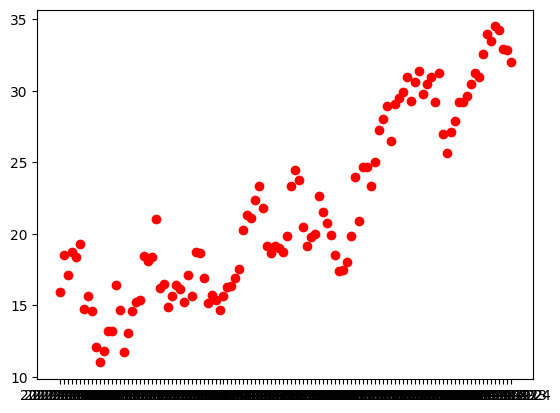

In [6]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.show()

**Calculate EWMA**

In [8]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [9]:
x1

,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


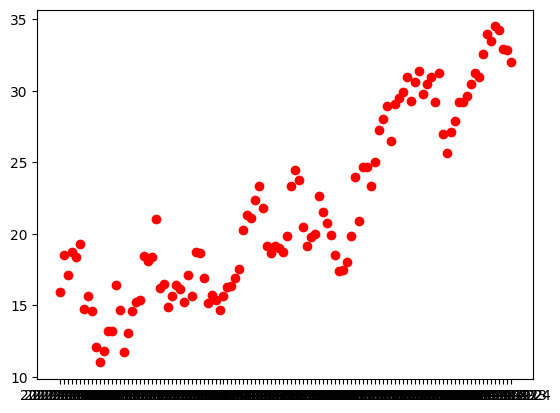

In [11]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.show()

In [12]:
x1 = df['meantemp'].ewm(alpha=0.9).mean() # alpha = 0.9 is best,here i am taking 10 days values then calculate average value so it will give goos result

In [13]:
x2 = df['meantemp'].ewm(alpha=0.5).mean() # alpha = 0.5 is best, here i am taking 5 days data,so it is not good compare to alpha=0.9

In [14]:
x3 = df['meantemp'].ewm(alpha=0.1).mean() # alpha = 0.5 is best, here i am taking 1 days data,so it is not good compare to alpha=0.9

In [15]:
df['ewma'] = x1
df

<ipython-input-15-c241313b4df9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewma'] = x1


,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


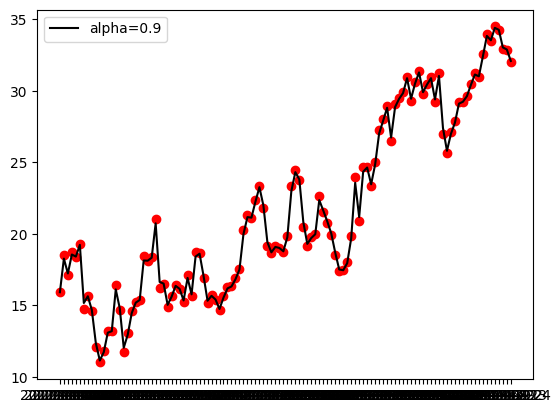

In [16]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],df['ewma'],color='black',label='alpha=0.9') # here touching all the value so it is good if alpha=0.9
plt.legend()
plt.show()


In [17]:
df['ewma'] = x2
df

<ipython-input-17-418c36563912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewma'] = x2


,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,17.637681
2,2017-01-03,17.111111,17.336784
3,2017-01-04,18.700000,18.063833
4,2017-01-05,18.388889,18.231604
...,...,...,...
109,2017-04-20,34.500000,33.833047
110,2017-04-21,34.250000,34.041523
111,2017-04-22,32.900000,33.470762
112,2017-04-23,32.875000,33.172881


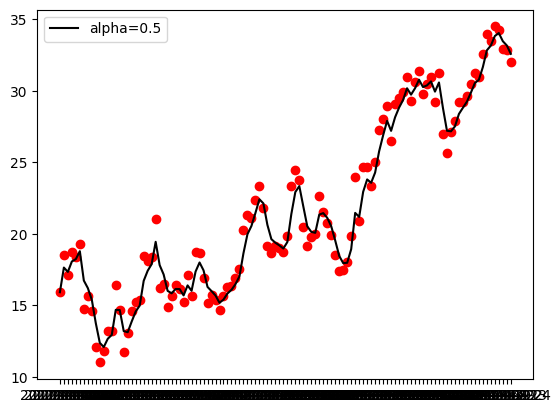

In [18]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x2,color='black',label='alpha=0.5') # here not touching all the value so it is not good compare to if alpha=0.9
plt.legend()
plt.show()


In [19]:
df['ewma'] = x3
df

<ipython-input-19-ac6601f1bcff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ewma'] = x3


,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,17.274600
2,2017-01-03,17.111111,17.214272
3,2017-01-04,18.700000,17.646295
4,2017-01-05,18.388889,17.827632
...,...,...,...
109,2017-04-20,34.500000,30.640166
110,2017-04-21,34.250000,31.001152
111,2017-04-22,32.900000,31.191039
112,2017-04-23,32.875000,31.359436


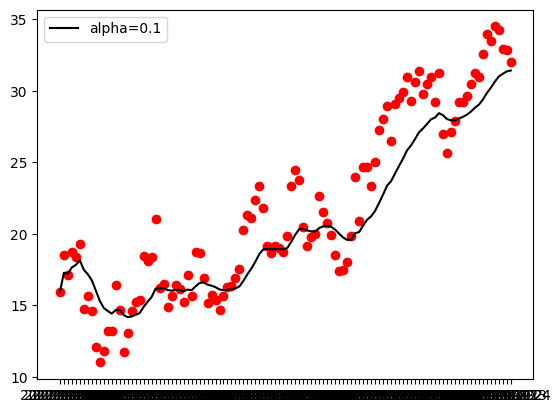

In [20]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x3,color='black',label='alpha=0.1') # here not touching all the value so it is not good compare to if alpha=0.9
plt.legend()
plt.show()


**Momentum**

In [ ]:
# coding wise we will use Adam.because it is best.
# For Learning wise we are reading momentum and all.

In [ ]:
# Q. why using Momentum?
# if local minima there then gradient descent will not work.

In [ ]:
# if graph is zic-zac.
# my target is reach to global minima
# if we will use gradient descent to reach the global minima then somewhere it will stuck,because gradient descent cant go back ward direction.
# thats why we are using momentum.

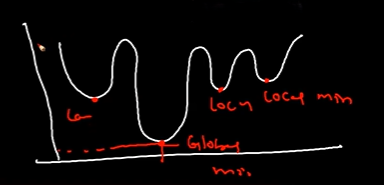

In [ ]:
# Momentum is technique to reduce the time.
# zic-zac graph is there,so here we have to smooth them by using Exponential Weighted Moving Average(EWMA),then they are touching all the point.

In [21]:
# if data is non-convex gradinet descent will not work. so we have use momentum.

In [ ]:
# SGD - Stocastic Gradient Descent
# mom - momentum
# NAG - Exponential weighted,moving avg
# N = nesterov

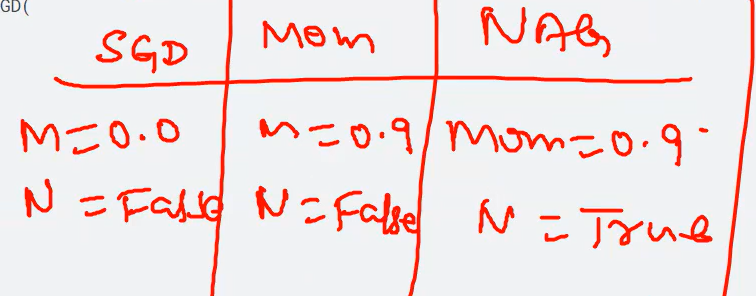

**RMSPRO(Root mean Square Propotion)**

In [ ]:
# This improvement of AdaGrow.
# It is Improvement of BGD.(In BGD model is very fast but accuracy is very poor)
# RmsPro can handle convex and non-convex data.
# It can also handle Sparse(Sparse means more 0) and Dense(Dense means non-zeo) data.

**Adam(best Approach)**

In [ ]:
# Adam - Adaptive moment Estimation
# Most powerful when we will use ANN/DNN,CNN,RNN/LSTM

In [1]:
# Adam is taken the concept from SGD/MBGD/BGD and Momentum also.
# Adam can handle convex and non-convex data.
# Adam can also handle Sparse(Sparse means more 0) and Dense(Dense means non-zeo) data.

In [2]:
# Adam = RmsPro + Momentum

In [ ]:
# RmsPro hyperparameter = beta1
# Momentum hyperparameter = beta2

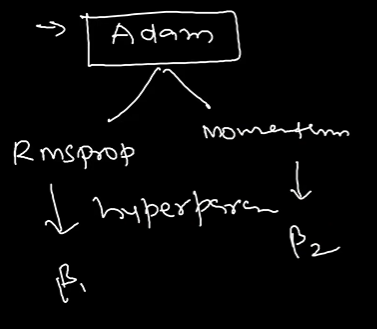

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [34]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [26]:
# training data = 60000
# test data = 10000

In [35]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

inpute_shape = (28,28,1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = x_train/255.0
x_test = x_test /255.0

In [36]:
batch_size = 32 # MBGD
num_classes = 10 # Multiclass classification (0-9)
epochs=10

def build_model(optimizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(256, activation='relu', input_shape=inpute_shape))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  return model

In [37]:
# Train our model basis different optimization method

optimizers = ['Adadelta','Adagrad','RMSPROP', 'SGD', 'Adam']

for i in optimizers:
  model = build_model(i)
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs,
                      verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1113 - loss: 2.3473 - val_accuracy: 0.2537 - val_loss: 2.1913
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2147 - loss: 2.1905 - val_accuracy: 0.4518 - val_loss: 2.0445
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3313 - loss: 2.0582 - val_accuracy: 0.6019 - val_loss: 1.8989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4414 - loss: 1.9225 - val_accuracy: 0.6869 - val_loss: 1.7503
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5255 - loss: 1.7879 - val_accuracy: 0.7338 - val_loss: 1.5999
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5914 - loss: 1.6514 - val_accuracy: 0.7632 - val_loss: 1.4530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6328 - loss: 1.5237 - val_accuracy: 0.7842 - val_loss: 1.3139
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6621 - loss: 1.4026 - 

In [38]:
# 'Adadelta' : Accuracy - Train and Test
# loss: 1.1310 - accuracy: 0.7115 - val_loss: 0.9430 - val_accuracy: 0.8233

#'Adagrad' : Accuracy - Train and Test
# loss: 0.3449 - accuracy: 0.9000 - val_loss: 0.2599 - val_accuracy: 0.9273

#'RMSPROP' : Accuracy - Train and Test
# loss: 0.0783 - accuracy: 0.9819 - val_loss: 0.0888 - val_accuracy: 0.9812

# SGD' : Accuracy - Train and Test
# loss: 0.1418 - accuracy: 0.9581 - val_loss: 0.1082 - val_accuracy: 0.9668

#'Adam' : Accuracy - Train and Test
# loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0717 - val_accuracy: 0.9821